# XOR 연산

In [ ]:
import numpy as np

In [ ]:
X = np.array([
              [0,0],
              [0,1],
              [1,0],
              [1,1]
              ], dtype="float32")
y = np.array([
              [1],
              [0],
              [0],
              [1]
],dtype = 'float32')

In [ ]:
# x에 곱해지는 값
w = np.array([[1],[2]],dtype="float32")
# x에 더해지는 값
b = np.array([[0],
             [1],
             [1],
             [0]], dtype="float32")

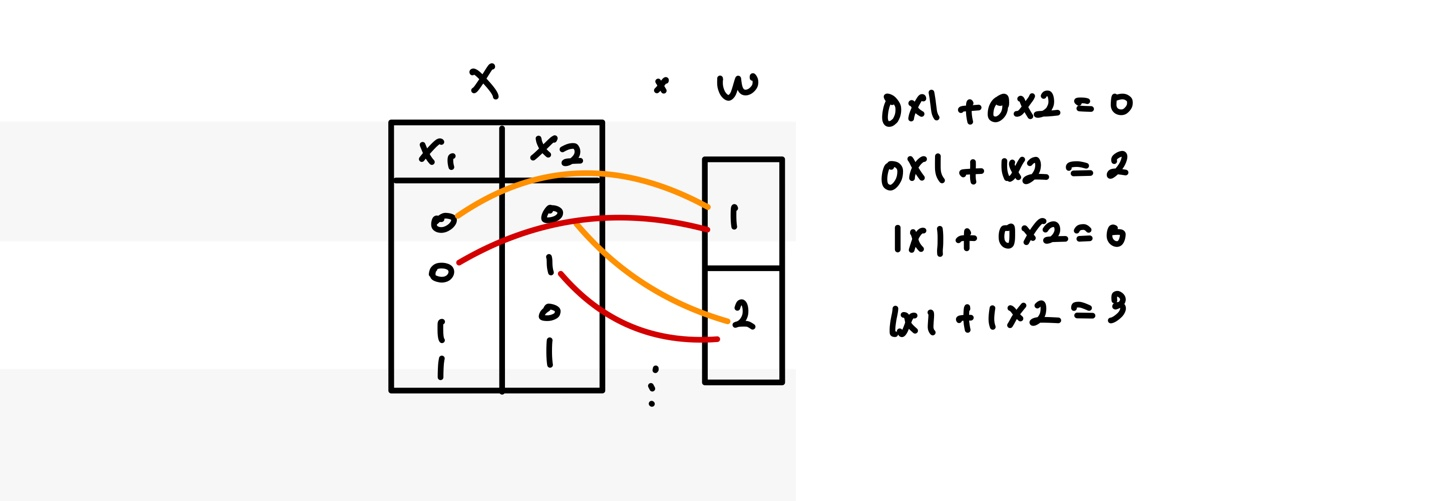

In [ ]:
# 예측값
hypothesis = np.dot(X , w) + b
hypothesis

array([[0.],
       [3.],
       [2.],
       [3.]], dtype=float32)

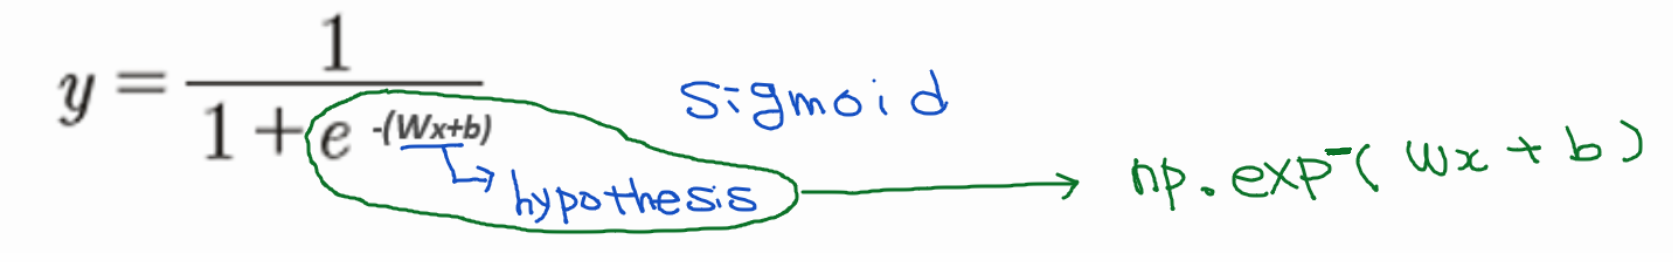

In [ ]:
# h를 0~1 사이 범위로 변경하는 활성함수 선언
def sigmoid(h):
  return 1 / (1 +np.exp(-h))

In [ ]:
# hypothesis 실행하여 예측값 구하고 활성함수 이용하여 값의 범위0~1사이로 변경
hypothesis = sigmoid(hypothesis)
hypothesis

array([[0.62245935],
       [0.7216326 ],
       [0.7069874 ],
       [0.7216326 ]], dtype=float32)

In [ ]:
# 예측-실제
(hypothesis - y)

array([[ 0.62245935],
       [-0.2783674 ],
       [-0.29301262],
       [ 0.7216326 ]])

In [ ]:
# 기울기 

# X1,X2 구하기 위해서 transform
print("X.T :\n",X.T)
print("="*50)

# 줄칸변한 0번째 줄 리턴
X.T[0]

# 이차원 배열 (hypothesis-y) 와 변환 위해 X.T를 2차원 배열로 변경
print("X.T[0] :\n",X.T[0].reshape(1,-1))
print("="*50)

# w1의 수정값 기울기
w1_gred = 1/4 *np.sum(np.dot(x1, (hypothesis - y)))
print('x1의 기울기 = ', w1_gred)
print("="*50)

# x2
x2 = X.T[1]
print("X.T[1] :\n",x2)
print("="*50)

w2_gred = 1/4 *np.sum(np.dot(x2, (hypothesis - y)))
print('x2의 기울기 =',w2_gred)
print("="*50)

# b의 기울기
b_gred = 1/4 * np.sum(hypothesis - y)
print('b의 기울기=',b_gred)

x1의 기울기 =  0.10715499520301819
x2의 기울기 = 0.11081629991531372
b의 기울기= 0.1931779831647873


In [ ]:
learning_rate = 0.1

# 반복해서 오차 제곱의 합이 0으로 수렴되는 w,b 찾기
# 1000번 실행
for i in range(1000):
  print("*" * 100)
  print(" i = ", i)
  print("*" * 100)
# ragne(2) -> x1,x2 2개 
  for j in range(2):
    print("step : ",j)

    # 예측
    hypothesis = sigmoid(np.dot(X,w)  + b)
    print("hypothesis = ",hypothesis)

    # 오차
    cost = -1/4 * np.sum(y * np.log(hypothesis) + (1 - y)* np.log(1- hypothesis))
    print("cost = ", cost)

    # 차원변경
    X_col_2d = X.T[j].reshape(1, -1)
    print("x{} = {}".format(j+1, X_col_2d))

    # 기울기 수정값
    w_gred = 1/4 * np.sum(np.dot ( X_col_2d , (hypothesis - y)))
    print("w{}_gred = {}".format(j+1, w_gred))
    
    # 편향 수정값
    b_gred = 1/4 * np.sum(hypothesis - y)
    print("b_gred = ", b_gred)

    # 기울기 수정
    w[j] = w[j] - learning_rate * w_gred
    print("w{} = {}".format(j+1, w[j]))

    # 편향 수정
    b = b - learning_rate * b_gred
    print("b = ", b)
    print("="*100)

j =  0
hypothesis =  [[0.5       ]
 [0.95257413]
 [0.880797  ]
 [0.95257413]]
cost =  0.9793125363066792
x1 = [[0. 0. 1. 1.]]
w1_gred = 0.2083427906036377
b_gred =  0.32148632407188416
w1 = [0.97916573]
b =  [[-0.03214863]
 [ 0.96785134]
 [ 0.96785134]
 [-0.03214863]]
j =  1
hypothesis =  [[0.49196354]
 [0.95110047]
 [0.875121  ]
 [0.9501223 ]]
cost =  0.9647279437631369
x2 = [[0. 1. 0. 1.]]
w2_gred = 0.2253056913614273
b_gred =  0.31707682460546494
w2 = [1.9774694]
b =  [[-0.06385632]
 [ 0.93614364]
 [ 0.93614364]
 [-0.06385632]]


In [ ]:
print('업뎃 된 w = ',w)
print('업뎃 된 b =', b)

w =  [[0.97916573]
 [1.9774694 ]]
b = [[-0.06385632]
 [ 0.93614364]
 [ 0.93614364]
 [-0.06385632]]


In [ ]:
predict = sigmoid(np.dot(X,w) + b)
print("predict : \n", predict)
print("=" * 100)

predict01 = np.where(predict > 0.5 , 1, 0)
print("0.5보다 크면 1, 아니면 0 : \n",predict01)

predict02  = (predict01 == y)
print("일치하면 True, 아니면 False : \n",predict02)

accuracy = np.sum(predict02)/4
print("정확도:", accuracy)

array([[0],
       [1],
       [1],
       [1]])